In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset/the result12.csv
/kaggle/input/utsemitten/The Emitten.csv


# **1. Exploratory Data Analysis**

# **1.1 Load Data**

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
%matplotlib inline
from scipy import stats

In [3]:
df0 = pd.read_csv('../input/utsemitten/The Emitten.csv')
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Emitten                  22 non-null     object 
 1   DER                      22 non-null     float64
 2   Operating Profit Margin  22 non-null     float64
 3   Return On Asset          22 non-null     float64
 4   Sales Growth             22 non-null     float64
 5   Category                 22 non-null     object 
 6   ;;;;                     0 non-null      float64
dtypes: float64(5), object(2)
memory usage: 1.3+ KB


In [4]:
df0.describe()

,DER,Operating Profit Margin,Return On Asset,Sales Growth,;;;;
count,22.000000,22.000000,22.000000,22.000000,0.0
mean,-1.055455,45.152727,-0.015455,507.733682,NaN
std,13.468427,183.262699,0.079566,901.756502,NaN
min,-37.460000,-112.340000,-0.180000,8.950000,NaN
25%,0.185000,-35.470000,-0.077500,77.502500,NaN
50%,0.850000,2.505000,0.010000,169.560000,NaN
75%,1.735000,24.140000,0.040000,426.370000,NaN
max,33.250000,780.630000,0.130000,3905.500000,NaN


# **1.2 Data Cleansing**

In [5]:
df0.drop(["Emitten","Category"], axis=1, inplace=True)

# **1.3 Scatter Plot**

<Figure size 1080x1080 with 0 Axes>

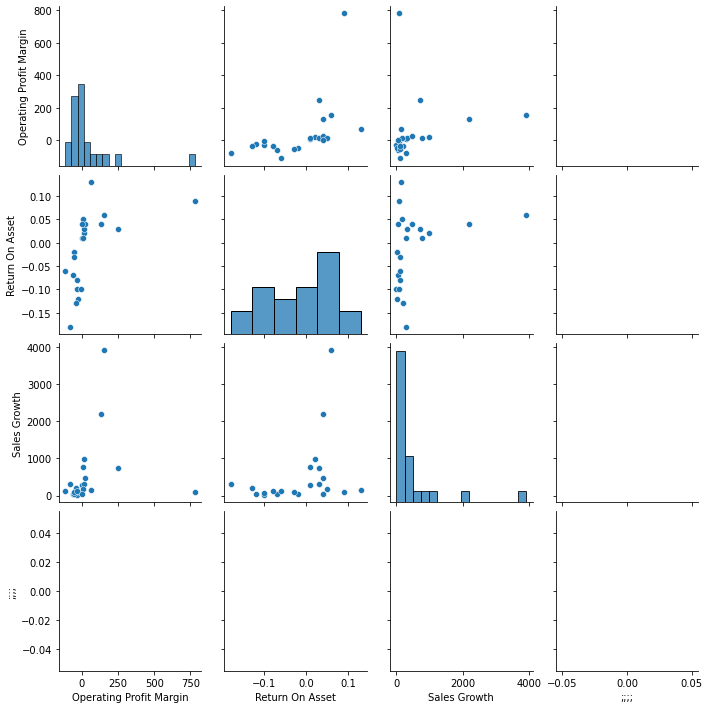

In [6]:
plt.figure(figsize=(15, 15))
sns.pairplot(df0, vars = df0.columns[1:13]);

# **2. Clustering**

# **2.1 load data**

In [7]:
df0 = pd.read_csv('../input/utsemitten/The Emitten.csv')
df1 = df0[['DER','Operating Profit Margin','Sales Growth','Category']]
df1.describe()

,DER,Operating Profit Margin,Sales Growth
count,22.000000,22.000000,22.000000
mean,-1.055455,45.152727,507.733682
std,13.468427,183.262699,901.756502
min,-37.460000,-112.340000,8.950000
25%,0.185000,-35.470000,77.502500
50%,0.850000,2.505000,169.560000
75%,1.735000,24.140000,426.370000
max,33.250000,780.630000,3905.500000


<AxesSubplot:xlabel='Emitten', ylabel='Operating Profit Margin'>

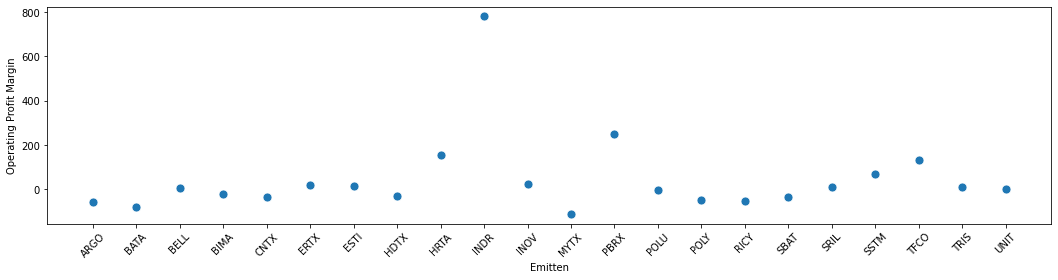

In [8]:
plt.figure(figsize=(18, 4))
plt.xticks(rotation=45)
sns.scatterplot(x='Emitten', y='Operating Profit Margin', 
                data=df0, s=80)

<AxesSubplot:xlabel='Emitten', ylabel='DER'>

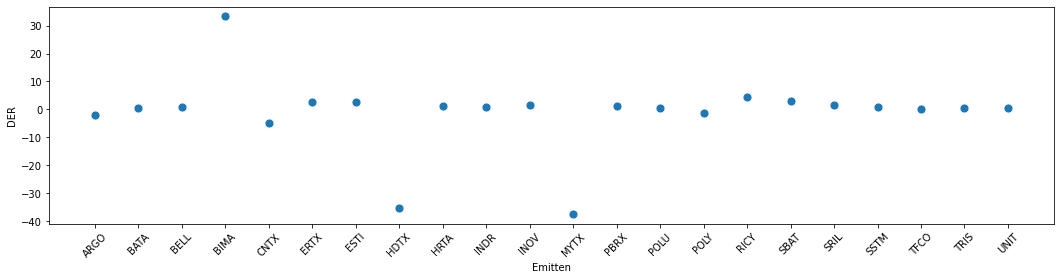

In [9]:
plt.figure(figsize=(18, 4))
plt.xticks(rotation=45)
sns.scatterplot(x='Emitten', y='DER', 
                data=df0, s=80)

<AxesSubplot:xlabel='Emitten', ylabel='Sales Growth'>

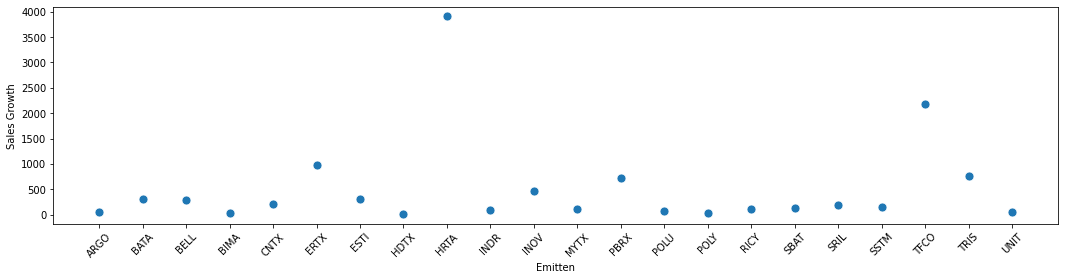

In [10]:
plt.figure(figsize=(18, 4))
plt.xticks(rotation=45)
sns.scatterplot(x='Emitten', y='Sales Growth', 
                data=df0, s=80)

# **2.2 Outlier**

In [11]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df1)}')

filtered_entries = np.array([False] * len(df1))
for col in ['Operating Profit Margin']:
    zscore = abs(stats.zscore(df1[col]))
    filtered_entries = (zscore < 3) | filtered_entries
    
df1 = df1[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df1)}')

Jumlah baris sebelum memfilter outlier: 22
Jumlah baris setelah memfilter outlier: 21


In [12]:
df1.describe()

,DER,Operating Profit Margin,Sales Growth
count,21.000000,21.000000,21.000000
mean,-1.150952,10.130000,527.553381
std,13.793396,83.247917,919.102211
min,-37.460000,-112.340000,8.950000
25%,0.090000,-35.700000,72.830000
50%,0.750000,0.240000,180.640000
75%,1.750000,19.520000,464.640000
max,33.250000,249.690000,3905.500000


# **2.3 Standardisasi Fitur**

In [13]:
feats = ['DER','Operating Profit Margin','Sales Growth']
X = df1[feats].values
y = df1['Category'].values

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
new_df = pd.DataFrame(data = X_std, columns = feats)
new_df.describe()

,DER,Operating Profit Margin,Sales Growth
count,2.100000e+01,2.100000e+01,2.100000e+01
mean,5.485030e-17,-1.387779e-17,3.172066e-17
std,1.024695e+00,1.024695e+00,1.024695e+00
min,-2.697356e+00,-1.507478e+00,-5.781842e-01
25%,9.218888e-02,-5.641195e-01,-5.069652e-01
50%,1.412195e-01,-1.217356e-01,-3.867692e-01
75%,2.155083e-01,1.155811e-01,-7.014131e-02
max,2.555606e+00,2.948734e+00,3.766029e+00


# **2.4 Lakukan K-means**

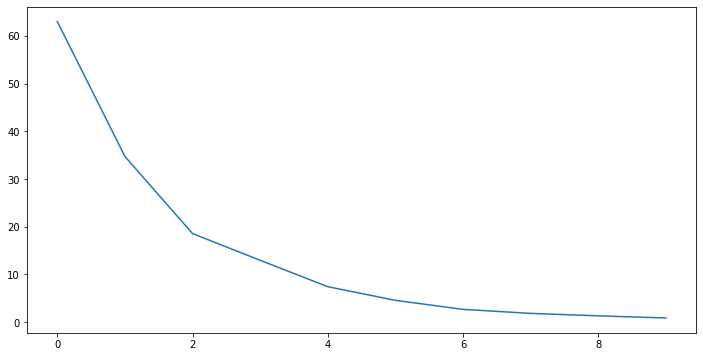

In [14]:
from sklearn.cluster import KMeans
inertia = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(new_df.values)
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.plot(inertia) #Elbow Method

# **2.5 Pilih Jumlah Cluster**

In [15]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(new_df.values)

KMeans(n_clusters=5, random_state=0)

In [16]:
new_df['target'] = y
new_df['fit'] = kmeans.labels_

# **2.6 Plot Cluster**

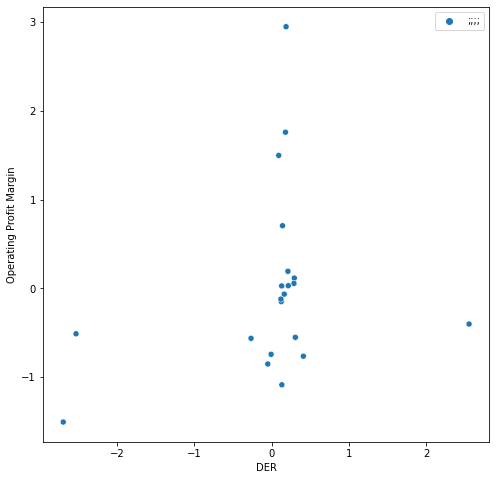

In [17]:
plt.rcParams["figure.figsize"] = (8, 8)
sns.scatterplot(x='DER', y='Operating Profit Margin', hue=new_df.target.to_list(), data=new_df);

In [18]:
new_df.head(5)

,DER,Operating Profit Margin,Sales Growth,target,fit
0,-0.049703,-0.853134,-0.533867,;;;;,0
1,0.132305,-1.087866,-0.246550,;;;;,0
2,0.163506,-0.065976,-0.260776,;;;;,0
3,2.555606,-0.402872,-0.557146,;;;;,3
4,-0.266626,-0.564120,-0.364338,;;;;,0


Assign fit to Category to create correct colour indicator

In [19]:
new_df.insert(0,"Category",np.nan,True)
new_df.loc[new_df['fit'] == 0, 'Category'] = 2
new_df.loc[new_df['fit'] == 1, 'Category'] = 4
new_df.loc[new_df['fit'] == 2, 'Category'] = 1
new_df.loc[new_df['fit'] == 3, 'Category'] = 0
new_df.loc[new_df['fit'] == 4, 'Category'] = 3
new_df['Category'] = new_df['Category'].astype(int)
new_df.head(5)

,Category,DER,Operating Profit Margin,Sales Growth,target,fit
0,2,-0.049703,-0.853134,-0.533867,;;;;,0
1,2,0.132305,-1.087866,-0.246550,;;;;,0
2,2,0.163506,-0.065976,-0.260776,;;;;,0
3,0,2.555606,-0.402872,-0.557146,;;;;,3
4,2,-0.266626,-0.564120,-0.364338,;;;;,0


Adjust column name to (St.) = Standardized

In [20]:
new_df.drop(["fit","target"], axis=1, inplace=True)
new_df.columns = ['Category','DER (St.)','Operating Profit Margin (St.)', 'Sales Growth (St.)']
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       21 non-null     int64  
 1   DER (St.)                      21 non-null     float64
 2   Operating Profit Margin (St.)  21 non-null     float64
 3   Sales Growth (St.)             21 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 800.0 bytes


# **2.6.1 3D Scatter Plot**

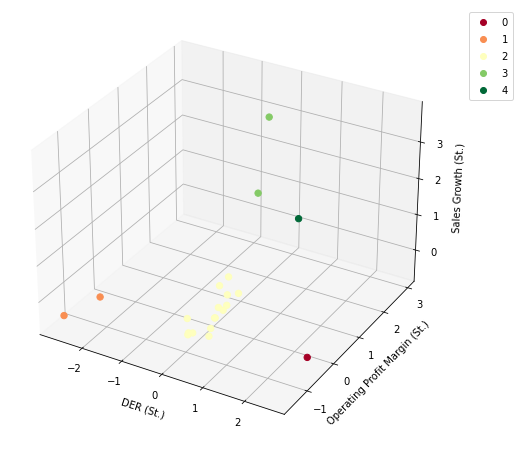

In [21]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')


x = new_df['DER (St.)']
y = new_df['Operating Profit Margin (St.)']
z = new_df['Sales Growth (St.)']

ax.set_xlabel("DER (St.)")
ax.set_ylabel("Operating Profit Margin (St.)")
ax.set_zlabel("Sales Growth (St.)")

cmap = ListedColormap(sns.color_palette("RdYlGn", 256).as_hex())

sc = ax.scatter(x, y, z, s=40, c=new_df['Category'], marker='o', cmap=cmap, alpha=1)
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

plt.show()

# **2.6.2 X vs Z View**

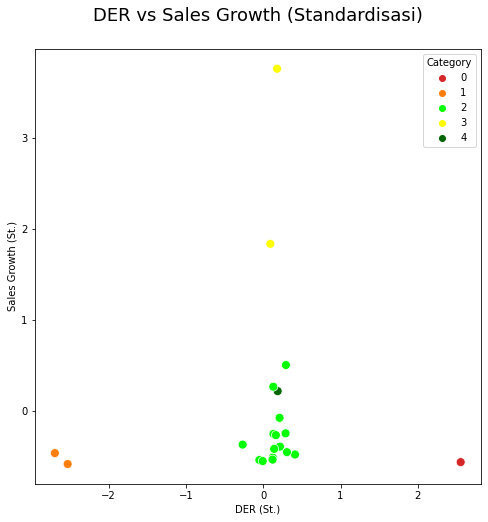

In [22]:
# color palette as dictionary
palette = {0:"tab:red",
           1:"tab:orange", 
           2:"lime",
           3:"yellow",
           4:"darkgreen"}

sns.scatterplot(x='DER (St.)', y='Sales Growth (St.)', 
                hue='Category', data=new_df, s=80,
                palette=palette)
plt.title("DER vs Sales Growth (Standardisasi)", fontsize=18, y=1.05)
plt.show()

# **2.6.3 Y vs Z View**

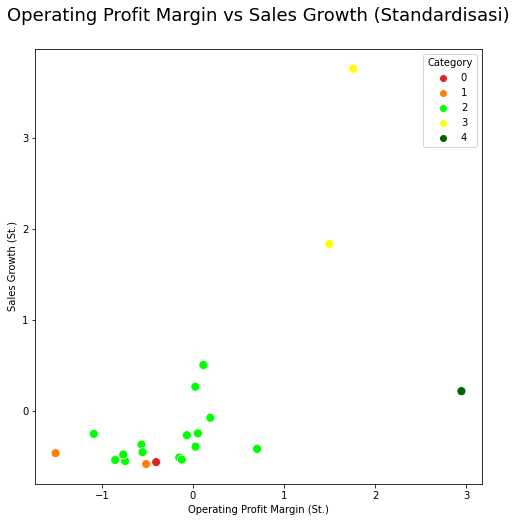

In [23]:
sns.scatterplot(x='Operating Profit Margin (St.)', y='Sales Growth (St.)', 
                hue='Category', data=new_df, s=80,
                palette=palette)
plt.title("Operating Profit Margin vs Sales Growth (Standardisasi)", fontsize=18, y=1.05)
plt.show()

# **2.6.4 X vs Y View**

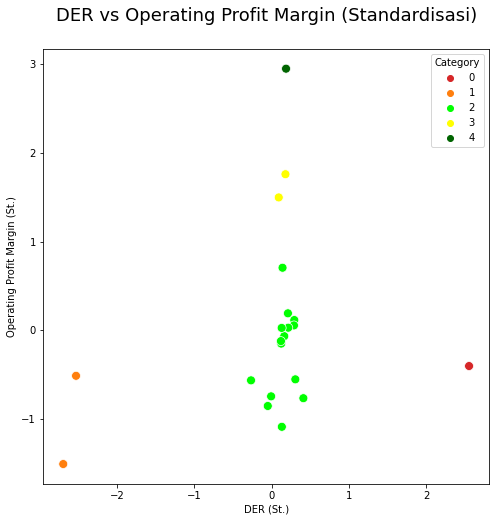

In [24]:
sns.scatterplot(x='DER (St.)', y='Operating Profit Margin (St.)', 
                hue='Category', data=new_df, s=80,
                palette=palette)
plt.title("DER vs Operating Profit Margin (Standardisasi)", fontsize=18, y=1.05)
plt.show()

# **3. Export Result**

In [25]:
index_names = df0[ df0['Emitten'] == 'ARTO' ].index
df0.drop(index_names, inplace = True)
df0.reset_index(drop=True, inplace=True)
df0.drop(["Category",
         ], axis=1, inplace=True)

In [26]:
dftemp = pd.read_csv('../input/dataset/the result12.csv')
df = pd.concat([dftemp, new_df, df0], axis=1)
df.head(5)

,Industry,Company,Category,DER (St.),Operating Profit Margin (St.),Sales Growth (St.),Emitten,DER,Operating Profit Margin,Return On Asset,Sales Growth,;;;;
0,Textiles,Argo Pantes Tbk.,2.0,-0.049703,-0.853134,-0.533867,ARGO,-1.82,-59.18,-0.07,48.70,NaN
1,Textiles,Sepatu Bata Tbk.,2.0,0.132305,-1.087866,-0.246550,BATA,0.63,-78.25,-0.18,306.41,NaN
2,Textiles,PT Trisula Textile Industries Tbk.,2.0,0.163506,-0.065976,-0.260776,BELL,1.05,4.77,0.01,293.65,NaN
3,Textiles,Primarindo Asia Infrastructure Tbk.,0.0,2.555606,-0.402872,-0.557146,BIMA,33.25,-22.60,-0.12,27.82,NaN
4,Textiles,Centex Tbk.,2.0,-0.266626,-0.564120,-0.364338,CNTX,-4.74,-35.70,-0.13,200.76,NaN


In [27]:
df.to_csv('the result12.csv', index = False)

# **4. Get Centroid**

In [28]:
kmeans.cluster_centers_

array([[ 0.14770739, -0.2521613 , -0.28246551],
       [ 0.18653568,  2.94873386,  0.22289558],
       [-2.61452414, -1.01025769, -0.51818093],
       [ 2.55560603, -0.40287218, -0.55714623],
       [ 0.13564784,  1.62853662,  2.80379759]])

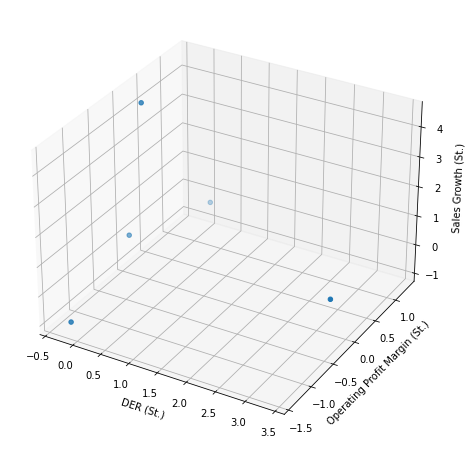

In [29]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
x = [0.07796577,3.3825386,-0.19978728,-0.22183117,-0.32525515]
y = [1.27721216,-0.22442569,-1.39490532,0.15549501,-0.03911061]
z = [-0.22773712,0.35006475,-0.89274149,4.44060221,0.14030381]

ax.set_xlabel("DER (St.)")
ax.set_ylabel("Operating Profit Margin (St.)")
ax.set_zlabel("Sales Growth (St.)")
ax.scatter(x, y, z)
plt.show()

# **5. Cluster Description**

In [30]:
#Highly Positively Impacted
df[df['Category'] == 4].describe()

,Category,DER (St.),Operating Profit Margin (St.),Sales Growth (St.),DER,Operating Profit Margin,Return On Asset,Sales Growth,;;;;
count,1.0,1.000000,1.000000,1.000000,1.00,1.00,1.00,1.00,0.0
mean,4.0,0.186536,2.948734,0.222896,-37.46,-112.34,-0.06,116.59,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,4.0,0.186536,2.948734,0.222896,-37.46,-112.34,-0.06,116.59,NaN
25%,4.0,0.186536,2.948734,0.222896,-37.46,-112.34,-0.06,116.59,NaN
50%,4.0,0.186536,2.948734,0.222896,-37.46,-112.34,-0.06,116.59,NaN
75%,4.0,0.186536,2.948734,0.222896,-37.46,-112.34,-0.06,116.59,NaN
max,4.0,0.186536,2.948734,0.222896,-37.46,-112.34,-0.06,116.59,NaN


In [31]:
#Highly Positively Impacted
df[df['Category'] == 3].describe()

,Category,DER (St.),Operating Profit Margin (St.),Sales Growth (St.),DER,Operating Profit Margin,Return On Asset,Sales Growth,;;;;
count,2.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.0
mean,3.0,0.135648,1.628537,2.803798,1.005000,110.240000,0.095000,2031.990000,NaN
std,0.0,0.061460,0.185129,1.360800,0.360624,60.570767,0.049497,2649.543251,NaN
min,3.0,0.092189,1.497631,1.841567,0.750000,67.410000,0.060000,158.480000,NaN
25%,3.0,0.113918,1.563084,2.322682,0.877500,88.825000,0.077500,1095.235000,NaN
50%,3.0,0.135648,1.628537,2.803798,1.005000,110.240000,0.095000,2031.990000,NaN
75%,3.0,0.157377,1.693990,3.284913,1.132500,131.655000,0.112500,2968.745000,NaN
max,3.0,0.179107,1.759442,3.766029,1.260000,153.070000,0.130000,3905.500000,NaN


In [32]:
#Highly Positively Impacted
df[df['Category'] == 2].describe()

,Category,DER (St.),Operating Profit Margin (St.),Sales Growth (St.),DER,Operating Profit Margin,Return On Asset,Sales Growth,;;;;
count,15.0,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,0.0
mean,2.0,0.147707,-0.252161,-0.282466,0.803333,60.896667,-0.022000,429.024733,NaN
std,0.0,0.164978,0.486581,0.307588,2.220076,215.763746,0.075233,565.421050,NaN
min,2.0,-0.266626,-1.087866,-0.545706,-4.740000,-78.250000,-0.180000,38.081000,NaN
25%,2.0,0.122276,-0.654283,-0.490220,0.305000,-43.025000,-0.075000,97.195000,NaN
50%,2.0,0.141220,-0.121736,-0.386769,0.950000,4.770000,0.010000,200.760000,NaN
75%,2.0,0.252281,0.042097,-0.243679,2.245000,17.055000,0.030000,519.520000,NaN
max,2.0,0.410888,0.705057,0.509689,4.380000,780.630000,0.090000,2179.350000,NaN


In [33]:
#Highly Positively Impacted
df[df['Category'] == 1].describe()

,Category,DER (St.),Operating Profit Margin (St.),Sales Growth (St.),DER,Operating Profit Margin,Return On Asset,Sales Growth,;;;;
count,2.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.0
mean,1.0,-2.614524,-1.010258,-0.518181,-16.770000,-2.935000,-0.030000,236.795000,NaN
std,0.0,0.117142,0.703176,0.084857,26.106382,40.467721,0.098995,322.221489,NaN
min,1.0,-2.697356,-1.507478,-0.578184,-35.230000,-31.550000,-0.100000,8.950000,NaN
25%,1.0,-2.655940,-1.258868,-0.548183,-26.000000,-17.242500,-0.065000,122.872500,NaN
50%,1.0,-2.614524,-1.010258,-0.518181,-16.770000,-2.935000,-0.030000,236.795000,NaN
75%,1.0,-2.573108,-0.761648,-0.488179,-7.540000,11.372500,0.005000,350.717500,NaN
max,1.0,-2.531692,-0.513037,-0.458178,1.690000,25.680000,0.040000,464.640000,NaN


In [34]:
#Highly Positively Impacted
df[df['Category'] == 0].describe()

,Category,DER (St.),Operating Profit Margin (St.),Sales Growth (St.),DER,Operating Profit Margin,Return On Asset,Sales Growth,;;;;
count,1.0,1.000000,1.000000,1.000000,1.00,1.0,1.00,1.00,0.0
mean,0.0,2.555606,-0.402872,-0.557146,33.25,-22.6,-0.12,27.82,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.0,2.555606,-0.402872,-0.557146,33.25,-22.6,-0.12,27.82,NaN
25%,0.0,2.555606,-0.402872,-0.557146,33.25,-22.6,-0.12,27.82,NaN
50%,0.0,2.555606,-0.402872,-0.557146,33.25,-22.6,-0.12,27.82,NaN
75%,0.0,2.555606,-0.402872,-0.557146,33.25,-22.6,-0.12,27.82,NaN
max,0.0,2.555606,-0.402872,-0.557146,33.25,-22.6,-0.12,27.82,NaN
